In [681]:
import numpy as np
from matplotlib import pyplot as plt
from sympy import*

In [682]:
mX = [
        [
            [10, 2, -6],
            [-1, 4, 2],
            [2, 3, 6]
        ],
        [
            [-5, 2, -8],
            [4, -3, -9],
            [-8, -10, 9]
        ],
        [
            [10, -5, 3, 0],
            [3, -9, 2, -2],
            [-8, 0, 17, -4],
            [3, -3, -8, -15]
        ],
]

mY = [
    [17, -4, -12],
    [13, -7, -2],
    [9, 10, -10, -18]
]

In [683]:
def checkDiagonallyDominant(x):
    x = np.array(x)
    diag = np.diag(np.abs(x))

    sumWithDiagonal = np.sum(np.abs(x), axis=1)
    sumWithoutDiagonal = sumWithDiagonal - diag
    
    for i in range(len(x)):
        print(f"Diagonal {i+1} = {diag[i]}")
        print("Total of not diagonal value = ", end="")

        sudahPrint = 0
        for j, element in enumerate(x[i]):
            if np.abs(element) != diag[i]:
                if sudahPrint != 0:
                    print("+", end=" ")

                print(f"|{element}|", end=" ")
                sudahPrint += 1
    
        print(f"= {sumWithoutDiagonal[i]}")

        if diag[i] > sumWithoutDiagonal[i]:
            print(f"{diag[i]} > {sumWithoutDiagonal[i]}")
        elif diag[i] < sumWithoutDiagonal[i]:
            print(f"{diag[i]} < {sumWithoutDiagonal[i]}")


    if np.all(sumWithoutDiagonal > diag):
        return False
    else:
        return True

In [684]:
for i, x in enumerate(mX):
    print(f"Equation {i+1} Array X: ")
    if(checkDiagonallyDominant(x)):
        print("This Equation is Diagonally Dominant")
    else:
        print("This Equation is not Diagonally Dominant!")
    print()

Equation 1 Array X: 
Diagonal 1 = 10
Total of not diagonal value = |2| + |-6| = 8
10 > 8
Diagonal 2 = 4
Total of not diagonal value = |-1| + |2| = 3
4 > 3
Diagonal 3 = 6
Total of not diagonal value = |2| + |3| = 5
6 > 5
This Equation is Diagonally Dominant

Equation 2 Array X: 
Diagonal 1 = 5
Total of not diagonal value = |2| + |-8| = 10
5 < 10
Diagonal 2 = 3
Total of not diagonal value = |4| + |-9| = 13
3 < 13
Diagonal 3 = 9
Total of not diagonal value = |-8| + |-10| = 18
9 < 18
This Equation is not Diagonally Dominant!

Equation 3 Array X: 
Diagonal 1 = 10
Total of not diagonal value = |-5| + |3| + |0| = 8
10 > 8
Diagonal 2 = 9
Total of not diagonal value = |3| + |2| + |-2| = 7
9 > 7
Diagonal 3 = 17
Total of not diagonal value = |-8| + |0| + |-4| = 12
17 > 12
Diagonal 4 = 15
Total of not diagonal value = |3| + |-3| + |-8| = 14
15 > 14
This Equation is Diagonally Dominant



In [685]:
def gaussSeidel(x, y, epsilon, limit):
    x = np.array(x)
    y = np.array(y)

    diag = np.diag(np.abs(x))
    sumWithDiagonal = np.sum(np.abs(x), axis=1)
    sumWithoutDiagonal = sumWithDiagonal - diag

    if np.all(sumWithoutDiagonal > diag):
        print("This Equation is not Diagonally Dominant!")
        return False
    
    print("This Equation is Diagonally Dominant")

    
    oldValue = np.zeros(x.shape[0])
    diagonal = np.diag(x)
    x = -x
    np.fill_diagonal(x, 0)

    for k, el in enumerate(x):
        print(f"X{k} = ({y[k]} +",end=" ")

        tandaPrint = 0
        for m, var in enumerate(x[k]):
            if var != diag[k] and var != 0:
                if tandaPrint != 0:
                    print("+", end=" ")

                print(f"({var}X{m+1}) ", end="")
                tandaPrint += 1

        print(f") / {diag[k]}", end=" ")
        print()
    print()

    for i in range(limit):
        newValue = np.array(oldValue)

        print(f"Iteration: {i+1}| ", end=" ")
        for j, row in enumerate(x):
            newValue[j] = (y[j] + np.dot(row, newValue))/diagonal[j]
            print(f"X{j+1} = {round(newValue[j], 8)}", end=", ")
        print()

        distance = np.sqrt(np.sum(np.dot(newValue - oldValue, newValue - oldValue)))

        if distance < epsilon:
            print()
            print("Converged!")
            print("Result: ")
            for j, row in enumerate(x):
                print(f"X{j} = {round(newValue[j], 8)}")
            return 

        oldValue = newValue

    print()
    print("Not Converged! Need more Iteration!")
    return False

In [686]:
for i, (x, y) in enumerate(zip(mX, mY)):
    print(f"Equation {i + 1}")
    gaussSeidel(x, y, 0.01456, 5)

    print()
    print("=========================================")

Equation 1
This Equation is Diagonally Dominant
X0 = (17 + (-2X2) + (6X3) ) / 10 
X1 = (-4 + (1X1) + (-2X3) ) / 4 
X2 = (-12 + (-2X1) + (-3X2) ) / 6 

Iteration: 1|  X1 = 1.7, X2 = -0.575, X3 = -2.27916667, 
Iteration: 2|  X1 = 0.4475, X2 = 0.25145833, X3 = -2.27489583, 
Iteration: 3|  X1 = 0.28477083, X2 = 0.20864062, X3 = -2.19924392, 
Iteration: 4|  X1 = 0.33872552, X2 = 0.18430334, X3 = -2.20506018, 
Iteration: 5|  X1 = 0.34010322, X2 = 0.1875559, X3 = -2.20714569, 

Converged!
Result: 
X0 = 0.34010322
X1 = 0.1875559
X2 = -2.20714569

Equation 2
This Equation is not Diagonally Dominant!

Equation 3
This Equation is Diagonally Dominant
X0 = (9 + (5X2) + (-3X3) ) / 10 
X1 = (10 + (-3X1) + (-2X3) + (2X4) ) / 9 
X2 = (-10 + (8X1) + (4X4) ) / 17 
X3 = (-18 + (-3X1) + (3X2) + (8X3) ) / 15 

Iteration: 1|  X1 = 0.9, X2 = -0.81111111, X3 = -0.16470588, X4 = 1.63006536, 
Iteration: 2|  X1 = 0.54385621, X2 = -1.32866376, X3 = 0.05124183, X4 = 1.54717502, 
Iteration: 3|  X1 = 0.22029557, X2 =

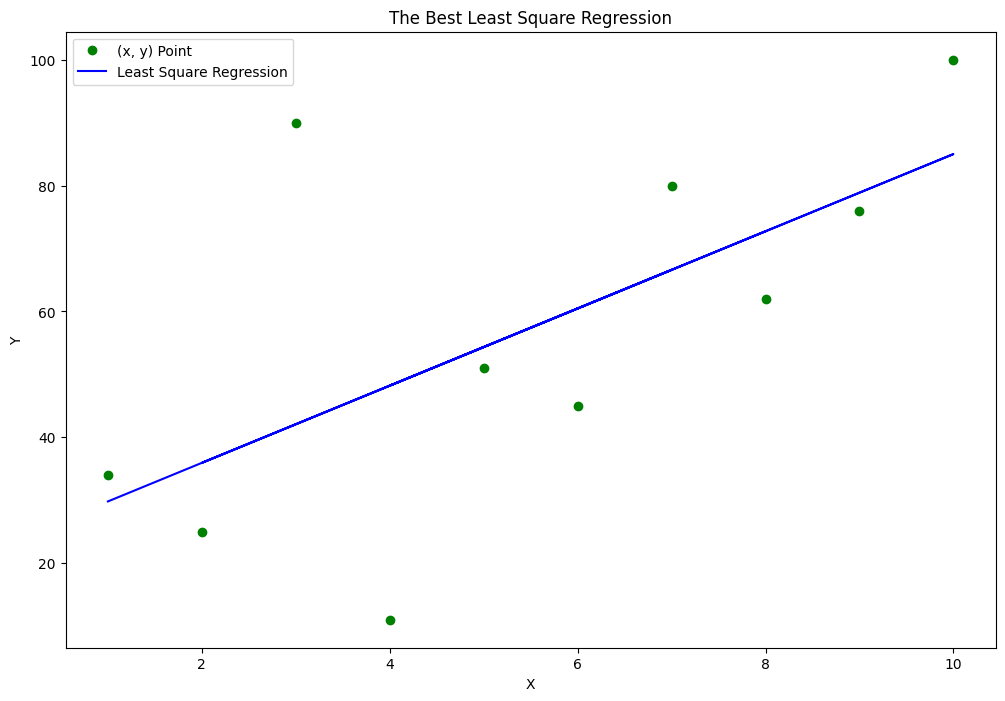

In [687]:
x = [1, 5, 7, 2, 3, 9, 10, 4, 6, 8]
y = [34, 51, 80, 25, 90, 76, 100, 11, 45, 62]

x = np.array(x)
y = np.array(y)

A = np.vstack([x, np.ones(len(x))]).T
Y = np.vstack(y)

hasilInvers = np.linalg.inv(np.dot(A.T, A))
beta = np.dot(np.dot(hasilInvers, A.T), Y)

m = beta[0]
b = beta[1]

y_garis = m*x + b

plt.figure(figsize=(12,8))
plt.plot(x, y, 'go')
plt.plot(x, y_garis, 'b-')

plt.title("The Best Least Square Regression")
plt.legend(["(x, y) Point", "Least Square Regression"])
plt.xlabel("X")
plt.ylabel("Y")

plt.show()

In [688]:
def newtonRaphson(f, df, x0, tolerance, max, i):

    if max < 5:
        print(f"Iteration {i}, root : {x0}")     

    if max <= 0:
        print("With current iteration, the root is not found")
        return
    
    if np.abs(f(x0)) < tolerance:
        print(f"The Root: {x0}")
        return 
    

    return newtonRaphson(f, df, x0 - (f(x0)/df(x0)), tolerance, max-1, i+1)

In [689]:
x = symbols('x')
f1 = lambda x: 7*x**4 - 3*x**2 + x
df1 = diff(f1(x), x)
df1 = lambdify(x, df1, 'numpy')

f2 = lambda x: 8*x**6 + 5*x**4 - 2
df2 = diff(f2(x), x)
df2 = lambdify(x, df2, 'numpy')

x0 = 1
tolerance = 0.006541
max = 5
i = 0

print("Equation 1: ")
print("f(x) = 7x^4 - 3x^2 + x")
print("f'(x) = 28^x*3 - 6*x + 1")
newtonRaphson(f1, df1, x0, tolerance, max, i)

print()

print("Equation 2: ")
print("f(x) = 8x^6 + 5x^4 - 2")
print("f'(x) = 48x^5 + 20x^3")
newtonRaphson(f2, df2, x0, tolerance, max, i)


Equation 1: 
f(x) = 7x^4 - 3x^2 + x
f'(x) = 28^x*3 - 6*x + 1
Iteration 1, root : 0.782608695652174
Iteration 2, root : 0.6210684619745717
Iteration 3, root : 0.4941304782745192
Iteration 4, root : 0.3675198418052212
Iteration 5, root : -0.11948918023737432
With current iteration, the root is not found

Equation 2: 
f(x) = 8x^6 + 5x^4 - 2
f'(x) = 48x^5 + 20x^3
Iteration 1, root : 0.8382352941176471
Iteration 2, root : 0.7357300136098767
Iteration 3, root : 0.6956565368667311
Iteration 4, root : 0.6903195287760319
The Root: 0.6903195287760319


In [690]:
b = 3
a = -4
n = 30

boxWidth = (b-a)/(n-1)
x = np.linspace(a, b, n)

def f(x):
    return 3*x**4 - 7*x**2 + 5

xLeft = x[:-1]
yLeft = f(xLeft)
leftRiemann = boxWidth * np.sum(np.abs(yLeft))
print(f"Left Riemann : {leftRiemann}")

xRight = x[1:]
yRight = f(xRight)
rightRiemann = boxWidth * np.sum(np.abs(yRight))
print(f"Right Riemann: {rightRiemann}")

xMid = (xLeft + xRight)/2
yMid = f(xMid)
midRiemann = boxWidth * np.sum(np.abs(yMid))
print(f"Mid Riemann = {midRiemann}")

trapezoid = np.sum(np.abs(yLeft) + np.abs(yRight))/2 * boxWidth
print(f"Trapezoid = {trapezoid}")


Left Riemann : 645.1387652149571
Right Riemann: 530.2422134908192
Mid Riemann = 580.4556464297783
Trapezoid = 587.690489352888
